In [14]:
import pandas as pd
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st

movie_data = "data/movie_dataset.csv"
read_data = pd.read_csv(movie_data)
read_data

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...
4036,220000.0,Action Crime Thriller,9367,es,14.269792,04-09-1992,2.040920e+06,81.0,El Mariachi,6.6,238,Robert Rodriguez
4037,9000.0,Comedy Romance,72766,en,0.642552,26-12-2011,0.000000e+00,85.0,Newlyweds,5.9,5,Edward Burns
4038,0.0,Comedy Drama Romance TV-Movie,231617,en,1.444476,13-10-2013,0.000000e+00,120.0,"Signed, Sealed, Delivered",7.0,6,Scott Smith
4039,0.0,NaN,126186,en,0.857008,03-05-2012,0.000000e+00,98.0,Shanghai Calling,5.7,7,Daniel Hsia


In [2]:
genres_list = []
seen_genres = set()
num = 0
for index, row in read_data.iterrows():
    try:
        splited_word = row["genres"].split()
        for i in splited_word:
            if i not in seen_genres:
                genres_list.append(i)
                seen_genres.add(i)        
    except:
        num = num + 1               
print(f"Number of movies without a genre {num}")
genres_list


Number of movies without a genre 28


['Action',
 'Adventure',
 'Fantasy',
 'Science-Fiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TV-Movie']

In [28]:

count_dict = {}
def count(gen, cnt):
    sum_vot_avg = 0
    sum_budget = 0
    for index, row in read_data.iterrows():
        try:
            splited_word = row["genres"].split()
            for i in splited_word:
                if gen == i:
                    cnt = cnt + 1 
                    sum_vot_avg = sum_vot_avg + row['vote_average'] 
                    sum_budget = sum_budget + row["budget"]      
        except:
        
            pass
    return round(cnt,2),round((sum_vot_avg/cnt),2), sum_budget

for genre in genres_list:
    count_dict[genre] =count(genre, 0)
count_dict_df = pd.DataFrame(count_dict).transpose()
count_dict_df.columns = ["number of movies","Ratings","Budget"]
count_dict_df.index.name="Genres"
count_dict_df
  

,number of movies,Ratings,Budget
Genres,,,
Action,1029.0,6.01,5.759898e+10
Adventure,714.0,6.19,5.109756e+10
Fantasy,356.0,6.15,2.555175e+10
Science-Fiction,476.0,6.04,2.703719e+10
Crime,593.0,6.29,1.835885e+10
Drama,1875.0,6.39,4.405810e+10
Thriller,1073.0,6.03,3.805093e+10
Animation,207.0,6.36,1.526892e+10
Family,426.0,6.06,2.479603e+10


C:\Users\binod\AppData\Local\Temp\ipykernel_14192\2086432698.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(num_movies[i], avg_ratings[i], genre, fontsize=8, ha='left', va='bottom')


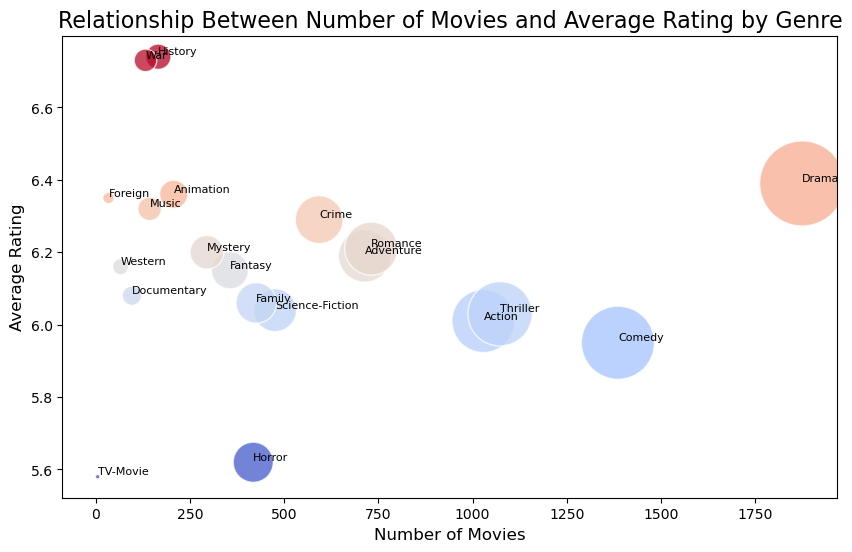

In [7]:
# Data
genres = genres_list
num_movies = count_dict_df.iloc[0,:]  # Number of movies in each genre
avg_ratings = count_dict_df.iloc[1,:]  # Average rating for each genre
sizes = [num * 2 for num in num_movies]  # Bubble size (scaled by a factor)

# Create the bubble chart
plt.figure(figsize=(10,6))
plt.scatter(num_movies, avg_ratings, s=sizes, alpha=0.75, c=avg_ratings, cmap='coolwarm', edgecolors="w")

# Add labels for genres
for i, genre in enumerate(genres):
     plt.text(num_movies[i], avg_ratings[i], genre, fontsize=8, ha='left', va='bottom')

# Add titles and labels
plt.title('Relationship Between Number of Movies and Average Rating by Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)

# Show the plot
plt.show()
#plt.savefig("bubble.png")

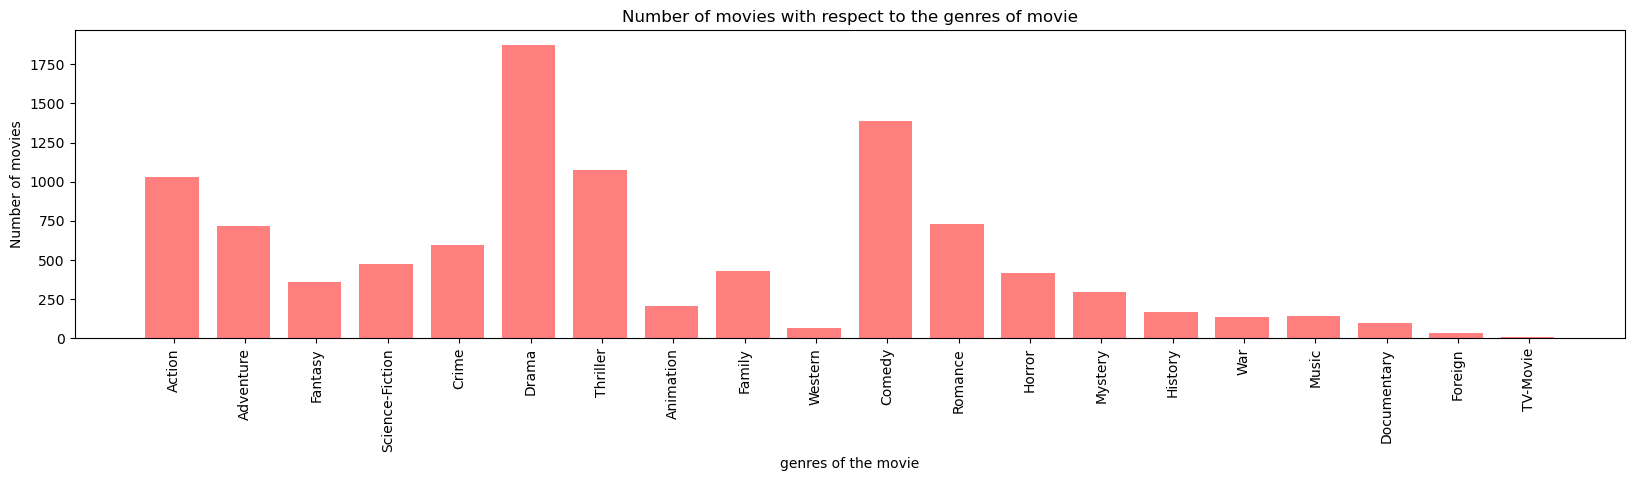

In [17]:
x_axis = np.arange(len(genres_list))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, count_dict_df.iloc[0,:], color='r', alpha=0.5, align="edge",width=.75)
plt.xticks(tick_locations, genres_list, rotation="vertical")
plt.xlabel("genres of the movie")
plt.ylabel("Number of movies")
plt.title("Number of movies with respect to the genres of movie")
plt.show()
#plt.savefig("bar.png")


In [11]:
eng_df = read_data.copy()
lang = eng_df['original_language'].value_counts()
lang_df = pd.DataFrame(lang)
eng_df


,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,vote_count,director
0,237000000.0,Action Adventure Fantasy Science-Fiction,19995,en,150.437577,10-12-2009,2.787965e+09,162.0,Avatar,7.2,11800,James Cameron
1,300000000.0,Adventure Fantasy Action,285,en,139.082615,19-05-2007,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski
2,245000000.0,Action Adventure Crime,206647,en,107.376788,26-10-2015,8.806746e+08,148.0,Spectre,6.3,4466,Sam Mendes
3,250000000.0,Action Crime Drama Thriller,49026,en,112.312950,16-07-2012,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan
4,260000000.0,Action Adventure Science-Fiction,49529,en,43.926995,07-03-2012,2.841391e+08,132.0,John Carter,6.1,2124,Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...
4036,220000.0,Action Crime Thriller,9367,es,14.269792,04-09-1992,2.040920e+06,81.0,El Mariachi,6.6,238,Robert Rodriguez
4037,9000.0,Comedy Romance,72766,en,0.642552,26-12-2011,0.000000e+00,85.0,Newlyweds,5.9,5,Edward Burns
4038,0.0,Comedy Drama Romance TV-Movie,231617,en,1.444476,13-10-2013,0.000000e+00,120.0,"Signed, Sealed, Delivered",7.0,6,Scott Smith
4039,0.0,NaN,126186,en,0.857008,03-05-2012,0.000000e+00,98.0,Shanghai Calling,5.7,7,Daniel Hsia


In [12]:
def lin_reg_plot(x,y,x_lab,y_lab):
    x_values = np.array(x)
    y_values = np.array(y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (0.05, 0.95), xycoords='axes fraction', fontsize=15, color="red")
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(f"{x_lab} vs {y_lab}")
    plt.show()
    

The correlation between revenue and the budget is 0.73


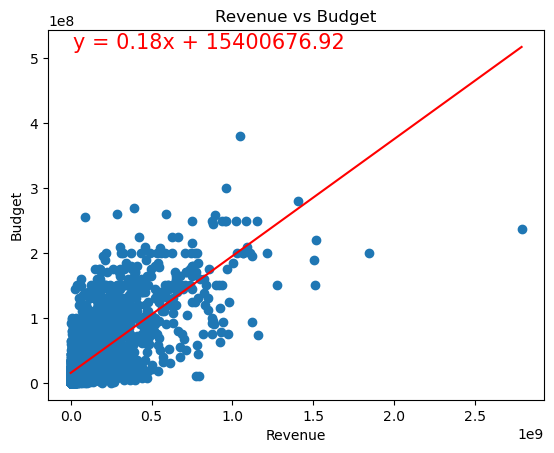

In [15]:
corelation = st.pearsonr(eng_df['revenue'],eng_df['budget'])
print(f"The correlation between revenue and the budget is {round(corelation[0],2)}")
lin_reg_plot(eng_df['revenue'],eng_df['budget'], 'Revenue','Budget')
#plt.savefig("Fig.png")
